In [96]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

In [97]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [98]:
X=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

In [99]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
X=iris["data"][:,(2,3)]
y=iris["target"]

In [101]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

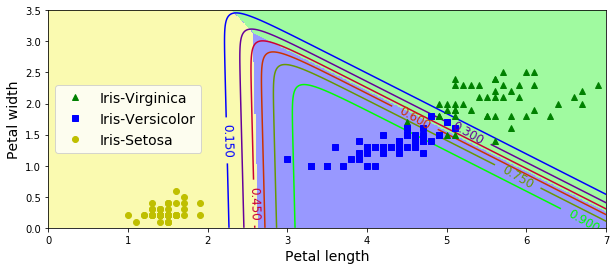

In [122]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [127]:
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.int)

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
log_reg.predict_proba([[3,3]])

array([[0.03089379, 0.96910621]])

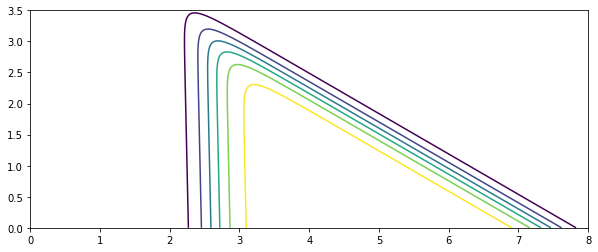

In [130]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_prob = log_reg.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.contour(x0,x1,zz)
plt.clabel(contour, inline=1, fontsize=12)

plt.show()

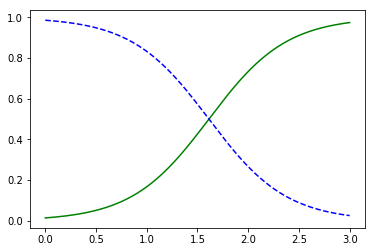

In [45]:
X_test = np.linspace(0,3,1000).reshape(-1,1)
y_res = log_reg.predict_proba(X_test)
plt.plot(X_test, y_res[:,1], "g-", label="1")
plt.plot(X_test, y_res[:,0], "b--", label="2")

In [74]:
#where prob>=0.5.  Nice python language!
decision_boundary = X_test[y_res[:,1]>=0.5][0]
decision_boundary

array([1.61561562])

In [49]:
log_reg.predict([[1.8],[2.0]])

array([1, 1])

In [75]:
# Training to output multiclass (using default logistic)
X=iris["data"][:,(2,3)]
y=iris["target"]

In [76]:
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
log_reg.predict([[2,5]])

array([2])

In [78]:
log_reg.predict_proba([[2,5]])

array([[0.00101796, 0.00116752, 0.99781452]])

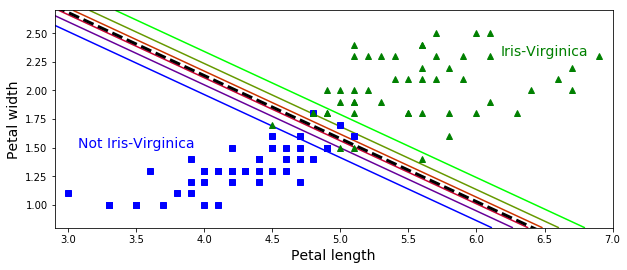

In [88]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

#plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [95]:
np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
           np.linspace(0.8, 2.7, 200).reshape(-1, 1))

[array([[2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        ...,
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ]]),
 array([[0.8       , 0.8       , 0.8       , ..., 0.8       , 0.8       ,
         0.8       ],
        [0.80954774, 0.80954774, 0.80954774, ..., 0.80954774, 0.80954774,
         0.80954774],
        [0.81909548, 0.81909548, 0.81909548, ..., 0.81909548, 0.81909548,
         0.81909548],
        ...,
        [2.68090452, 2.68090452, 2.68090452, ..., 2.68090452, 2.68090452,
         2.68090452],
        [2.6

In [62]:
# Training to output multiclass (this time using softmax=Logstic with multinomial option)
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
softmax_reg.predict_proba([[2,5]])

array([[7.97450273e-04, 6.29707872e-05, 9.99139579e-01]])